In [1]:
# kaggle competitions download -c dogs-vs-cats
# unzip dogs-vs-cats.zip -d data
# cd data
# unzip test1.zip
# unzip train.zip
# rename test1 test
import os

os.chdir("/Users/aapoliakova/PycharmProjects/cat_vs_dogs_competition")

In [6]:
import pathlib

data_root = pathlib.Path('data')
val_path = data_root.joinpath("val")
val_path.mkdir(exist_ok=True, parents=False)
!ls data

sampleSubmission.csv train
test                 val


In [13]:
train_path = data_root.joinpath("train")
imgs_path = list(train_path.iterdir())
labels = [int(img.name.startswith('dog')) for img in imgs_path]
print(len(imgs_path))

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

train_ids, val_ids = train_test_split(imgs_path, test_size=0.3, random_state=42, stratify=labels)
print(len(train_ids))
print(len(val_ids))

17500
7500


In [22]:
import shutil

for file in val_ids:
    shutil.copy(file, val_path / file.name)
    file.unlink()
print(len(list(val_path.iterdir())))
print(len(list(train_path.iterdir())))

7500
17500


In [1]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


# Augmentations =
def show_images(images, n_max=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]);
    ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:n_max]), nrow=8).permute(1, 2, 0))


def show_batch(dl, n_max=64):
    for images in dl:
        show_images(images, n_max)
        break

Testing dataset .. 
torch.Size([3, 224, 224]) 0
Testing loaders .. 
torch.Size([2, 3, 224, 224]) torch.Size([2])


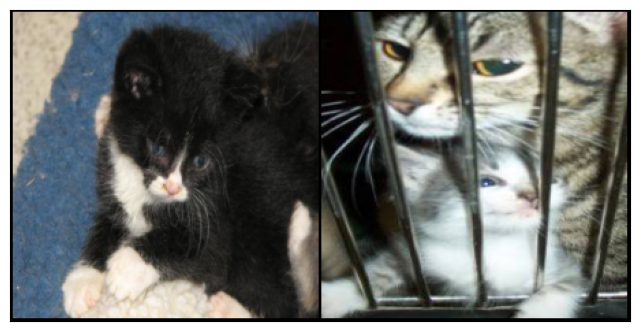

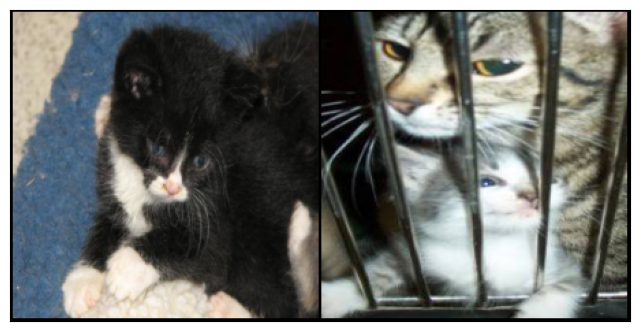

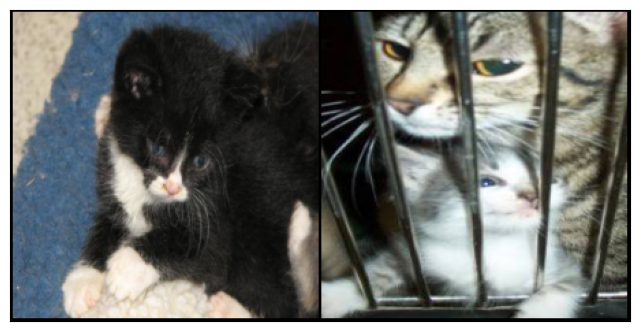

In [6]:
import pathlib
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from dataset import CatDogDataset
# torchvision.transforms.

transform = T.Compose([
    # T.RandomHorizontalFlip(p=0.5),
    T.Resize(size=(224, 224)),
    T.ToTensor()])

print("Testing dataset .. ")
dataset = CatDogDataset(root="data", split="test", transform=transform)

image, target = dataset[0]
print(image.shape, target)

print("Testing loaders .. ")
dataloader = DataLoader(dataset, batch_size=2)
batch = next(iter(dataloader))
imgs, targets = batch
print(imgs.shape, targets.shape)
for epoch in range(3):
    for batch in dataloader:
        show_batch(batch)

In [48]:
import pathlib
from PIL import Image
from torch.utils.data import  DataLoader
import torchvision.transforms as T
from dataset import CatDogDataset
# torchvision.transforms.

transform = T.Compose([
    # T.RandomPerspective(),
    # T.RandomHorizontalFlip(),
    # T.AugMix(),
    T.Resize(size=(224, 224)),
    T.ToTensor()
])


# weights = ResNet50_Weights.DEFAULT
# transform = weights.transforms()


print("Testing dataset .. ")
dataset = CatDogDataset(root="data", split="test", transform=transform)

image, target = dataset[0]
print(image.shape, target)

print("Testing loaders .. ")
dataloader = DataLoader(dataset, batch_size=2)
batch = next(iter(dataloader))
imgs, targets = batch
print(imgs.shape, targets.shape)

Testing dataset .. 
torch.Size([3, 224, 224]) 0
Testing loaders .. 
torch.Size([2, 3, 224, 224]) torch.Size([2])


In [55]:
from torchvision.models import resnet50, ResNet50_Weights
import torch.nn as nn
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.fc = nn.Sequential(nn.Linear(2048, 2))

In [58]:
logits = model(batch[0])
logits.shape

torch.Size([2, 2])

In [80]:
from torchmetrics import Accuracy
# accuracy(preds, target)
train_acc = Accuracy(task="multiclass", num_classes=2)

In [81]:
train_acc(logits, batch[1])

RuntimeError: Predictions and targets are expected to have the same shape, but got torch.Size([2, 2]) and torch.Size([2]).

In [64]:
logits.argmax(-1)

tensor([1, 1])

In [65]:
batch[1]

tensor([0, 0])

In [74]:
loss = nn.CrossEntropyLoss()
loss_ = loss(logits, batch[1])

In [75]:
loss_.backward()